# Wine Dataset Exploratory Data Analysis (EDA)

This notebook explores the **Wine dataset**, which is a classic multi-class classification problem. The dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Initial Exploration

In [2]:
# Load data
def load_wine_data():
    data = load_wine()
    X, y = data.data, data.target
    feature_names = data.feature_names
    target_names = data.target_names
    return X, y, feature_names, target_names

X, y, feature_names, target_names = load_wine_data()

print("=== WINE DATASET EXPLORATORY ANALYSIS ===")
print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {target_names}")
print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")

# Create DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

=== WINE DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (178, 13)
Target shape: (178,)
Number of classes: 3
Classes: ['class_0' 'class_1' 'class_2']
Number of features: 13
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## 2. Basic Statistics and Missing Values

In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===")
print(df.describe())

# Check for missing values
print("\n=== MISSING VALUES ===")
print(f"Missing values in features: {df.isnull().sum().sum()}")
print(f"Missing values in target: {pd.isnull(y).sum()}")

# Check for infinite values
print("\n=== INFINITE VALUES ===")
print(f"Infinite values in features: {np.isinf(X).sum()}")


=== BASIC STATISTICS ===
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0

## 3. Target Distribution and Feature Scales


=== TARGET DISTRIBUTION ===


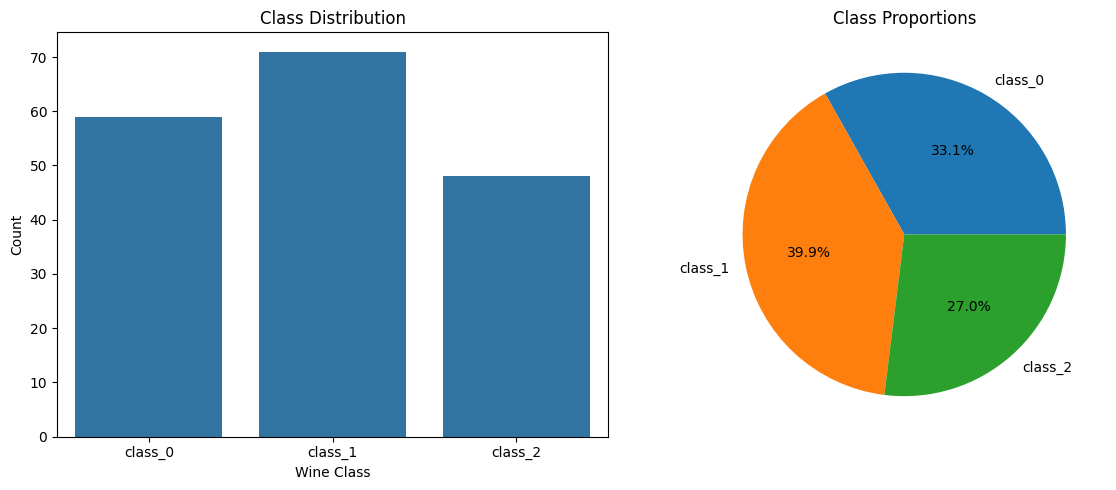


=== FEATURE SCALES ===
Feature ranges:
proline                         1402.00
magnesium                         92.00
alcalinity_of_ash                 19.40
color_intensity                   11.72
malic_acid                         5.06
flavanoids                         4.74
alcohol                            3.80
proanthocyanins                    3.17
total_phenols                      2.90
od280/od315_of_diluted_wines       2.73
ash                                1.87
hue                                1.23
nonflavanoid_phenols               0.53
dtype: float64


In [4]:
# Target distribution
print("\n=== TARGET DISTRIBUTION ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=target_names)

plt.subplot(1, 2, 2)
class_counts = pd.Series(y).value_counts().sort_index()
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%')
plt.title('Class Proportions')

plt.tight_layout()
plt.show()

# Feature scaling check
print("\n=== FEATURE SCALES ===")
df_features = df.drop('target', axis=1)
feature_ranges = df_features.max() - df_features.min()
print("Feature ranges:")
print(feature_ranges.sort_values(ascending=False))

## 4. Feature Distributions by Class


=== FEATURE DISTRIBUTIONS BY CLASS ===


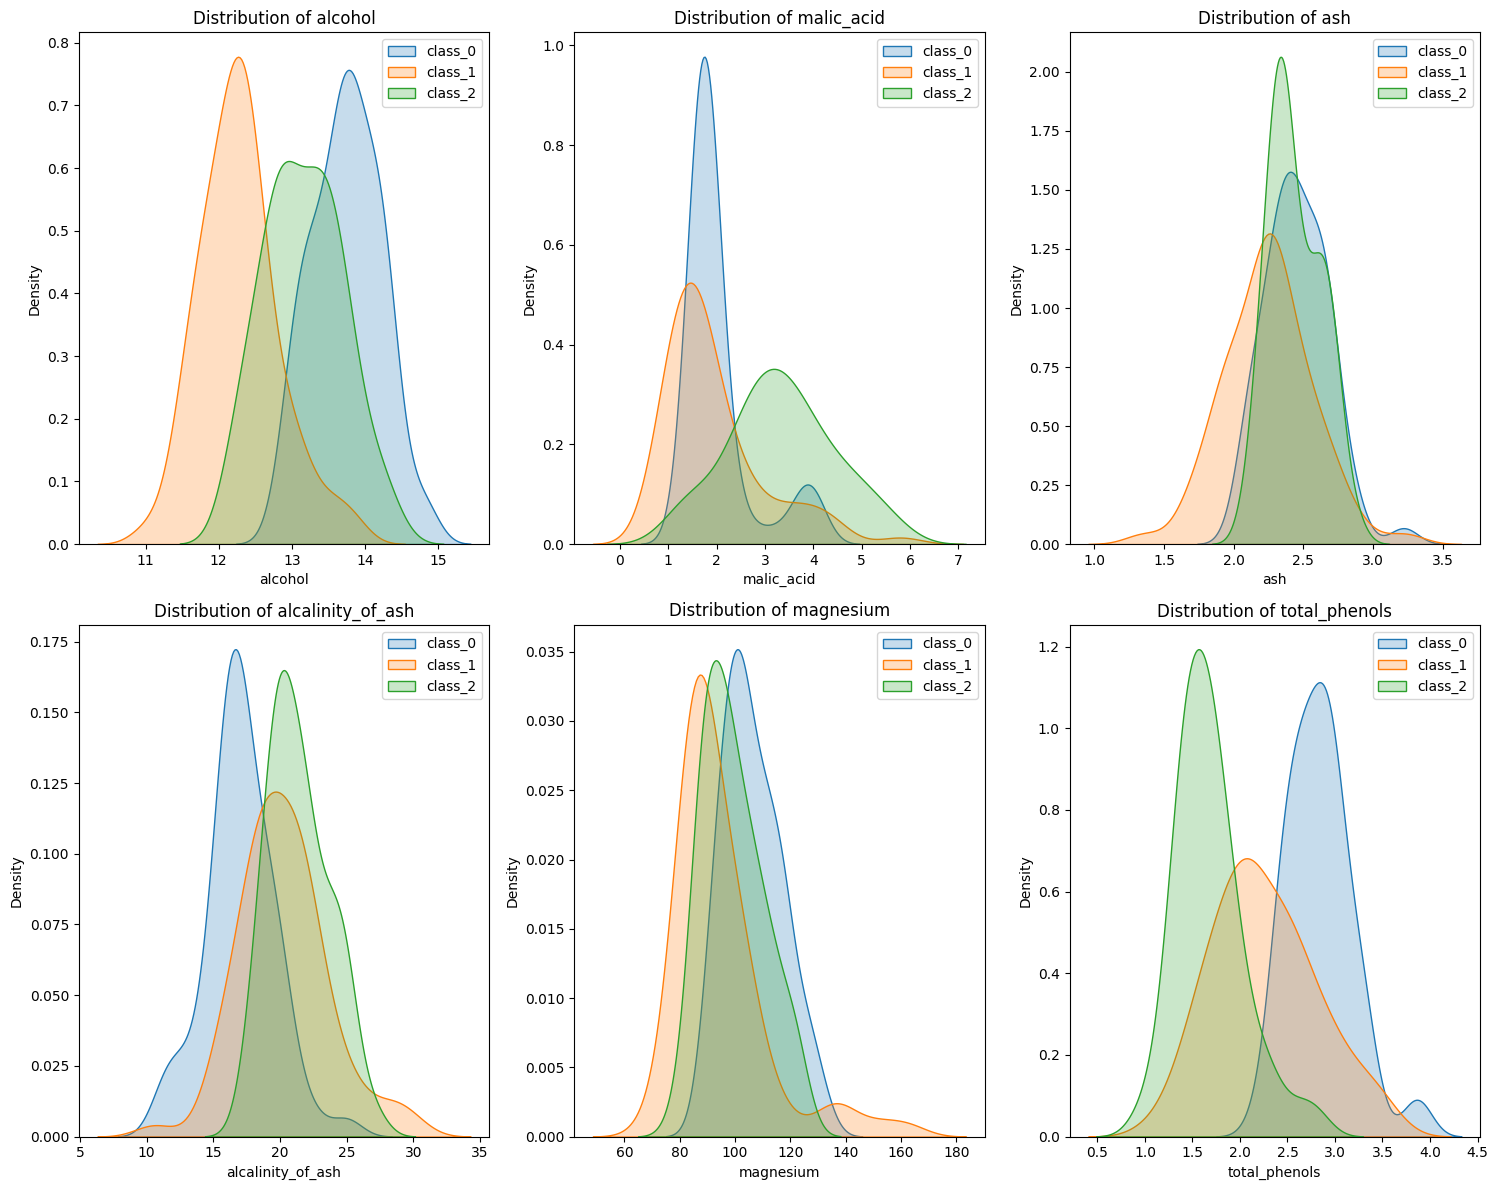

In [5]:
print("\n=== FEATURE DISTRIBUTIONS BY CLASS ===")
plt.figure(figsize=(15, 12))
for i, feature in enumerate(feature_names[:6]):  # First 6 features
    plt.subplot(2, 3, i+1)
    for class_id in range(3):
        sns.kdeplot(df[df['target'] == class_id][feature], 
                      label=target_names[class_id], fill=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

## 5. Correlation


=== CORRELATION ANALYSIS ===


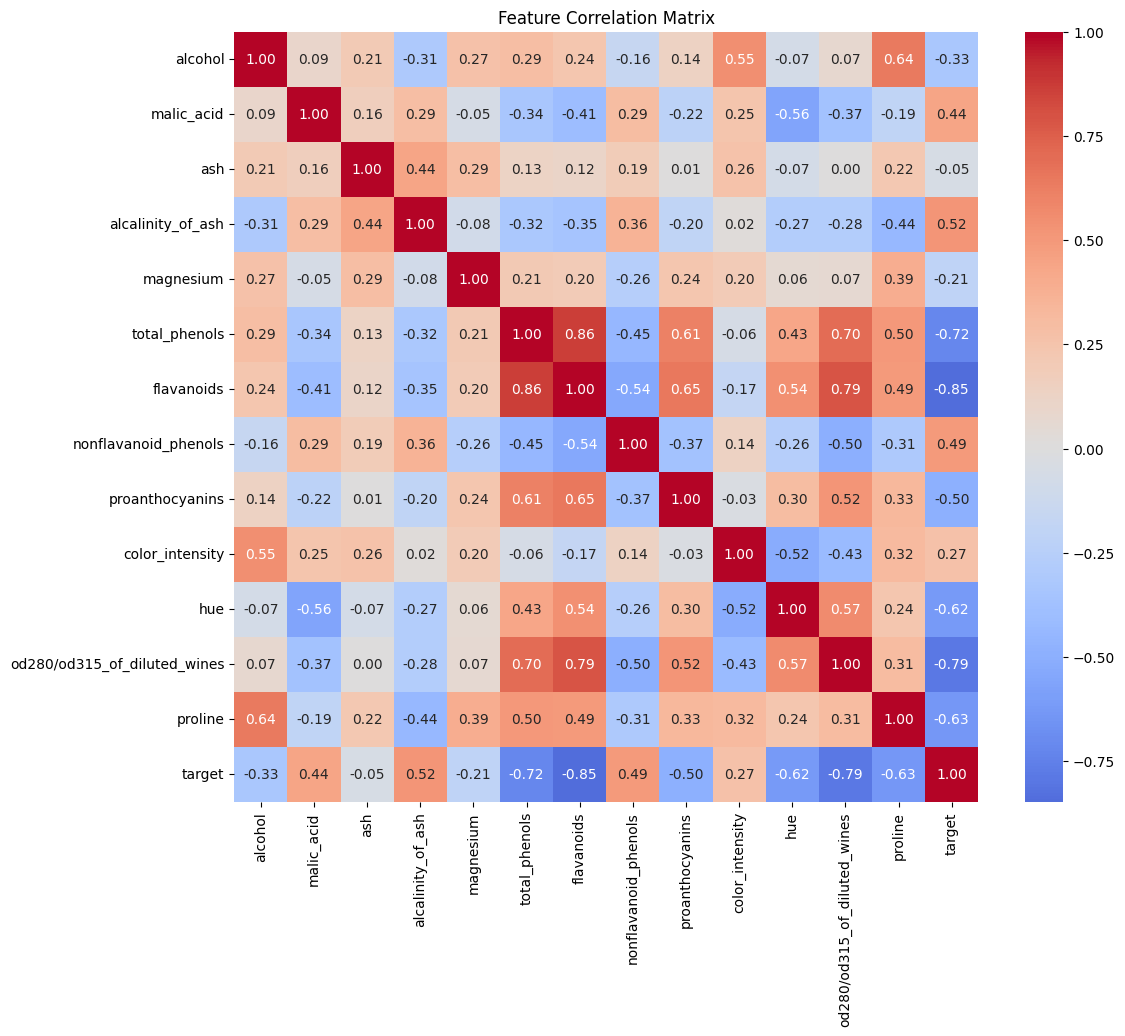

In [8]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===")
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


## 6. Outlier Detection and Summary


=== OUTLIER DETECTION ===


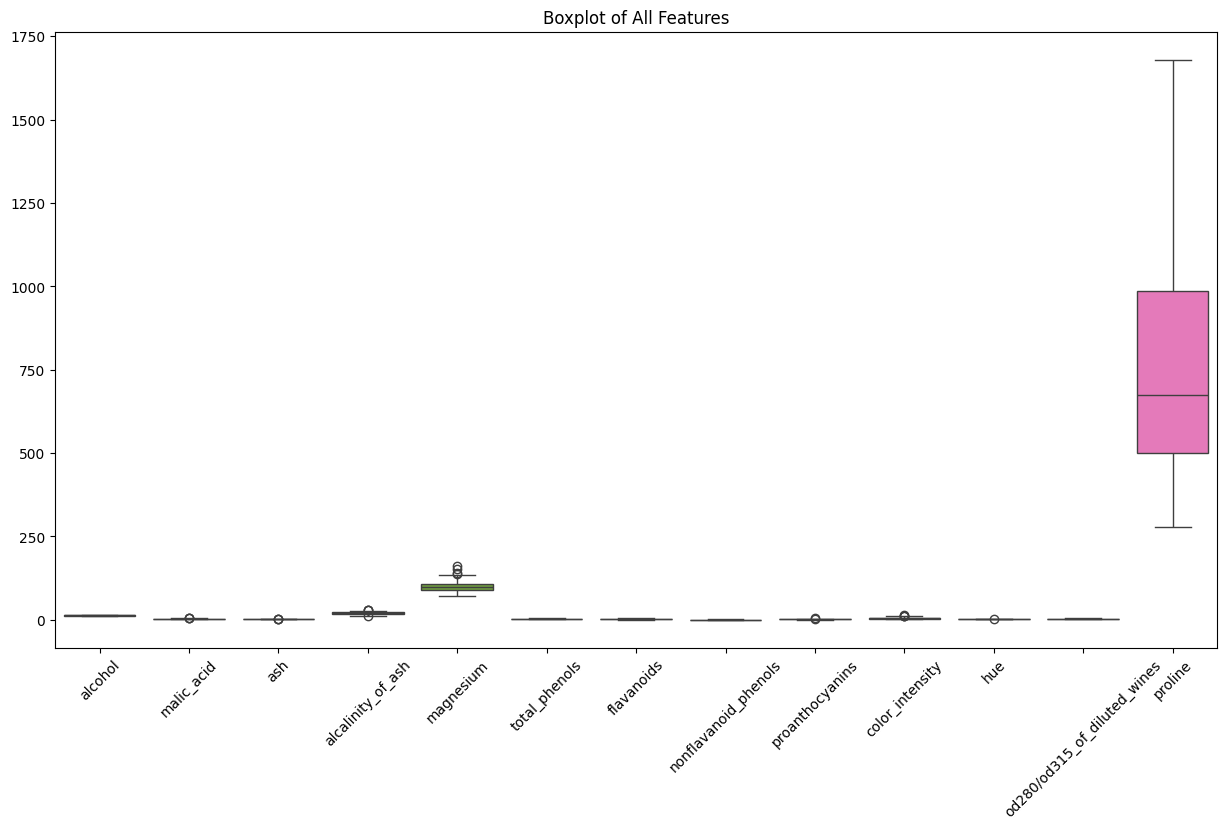


=== DATA QUALITY SUMMARY ===
✓ No missing values
✓ No infinite values
✓ 13 well-defined features
✓ Clear class separation in feature space
⚠️  Features have different scales (consider standardization)
⚠️  Some features are highly correlated
⚠️  Small dataset (178 samples)


In [ ]:
# Outlier detection
print("\n=== OUTLIER DETECTION ===")
plt.figure(figsize=(15, 8))
df_features = df.drop('target', axis=1)
sns.boxplot(data=df_features)
plt.title('Boxplot of All Features')
plt.xticks(rotation=45)
plt.show()